## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('a.csv', sep=';')

print("Basic Statistical Information:")
print(data.describe())
print("\nDataset Dimensions:")
print(data.shape)

Basic Statistical Information:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [4]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
target = data['y']

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [5]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

for column in bank_client.columns:
    print(f"{column}: {bank_client[column].unique()}")

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Max age: 98
Min age: 17
NaN values in age: 0


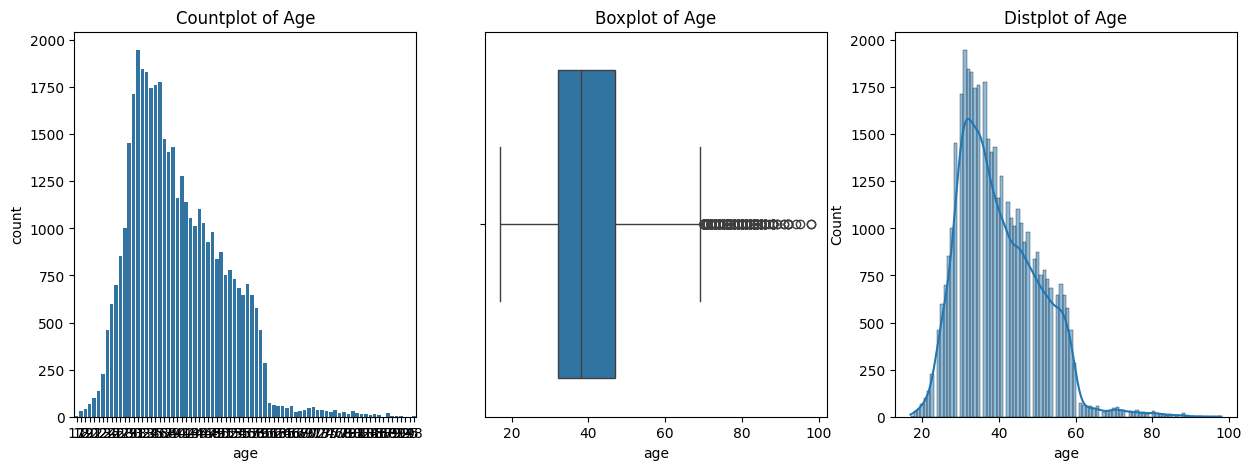

In [6]:
print("Max age:", data['age'].max())
print("Min age:", data['age'].min())
print("NaN values in age:", data['age'].isna().sum())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='age', data=data)
plt.title('Countplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='age', data=data)
plt.title('Boxplot of Age')

plt.subplot(1, 3, 3)
sns.histplot(data['age'], kde=True)
plt.title('Distplot of Age')
plt.show()


**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [7]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually
    """
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    
    return outliers

outliers = detect_outliers_with_interquantile_range(data, 'age', 10, 90)
print(outliers)


       age      job  marital education  default housing loan   contact month  \
38452   98  retired  married  basic.4y  unknown     yes   no  cellular   oct   
38455   98  retired  married  basic.4y  unknown     yes   no  cellular   oct   

      day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
38452         fri  ...         1      2         2      success         -3.4   
38455         fri  ...         2    999         0  nonexistent         -3.4   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
38452          92.431          -26.9       0.73       5017.5  1  
38455          92.431          -26.9       0.73       5017.5  1  

[2 rows x 21 columns]


In [8]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)

**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

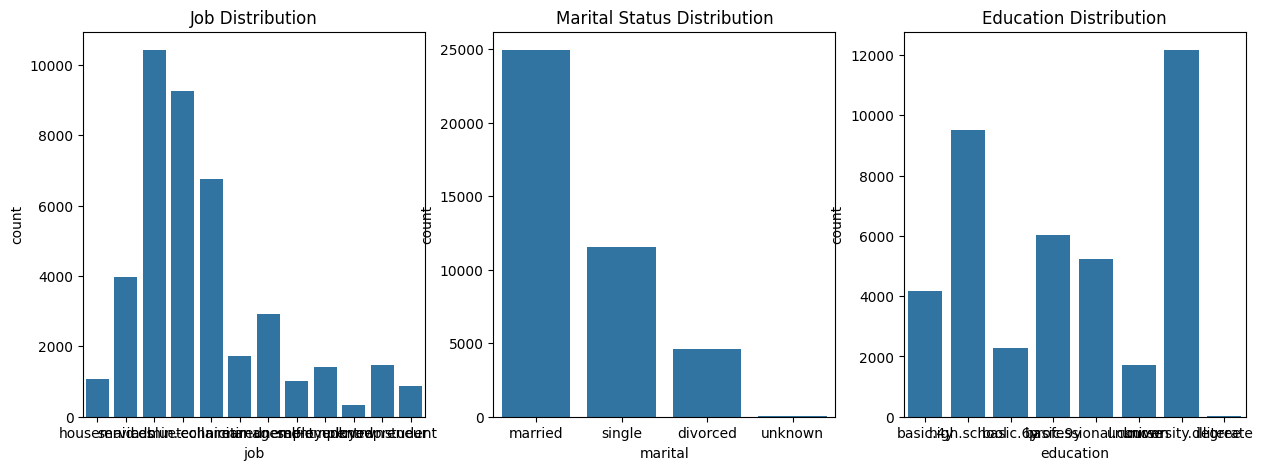

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='job', data=data)
plt.title('Job Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='marital', data=data)
plt.title('Marital Status Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='education', data=data)
plt.title('Education Distribution')

plt.show()


In [10]:
#code

In [11]:
#code

**Висновки з завдання 6 (детальні)**

1.   
2.   
3. ...

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

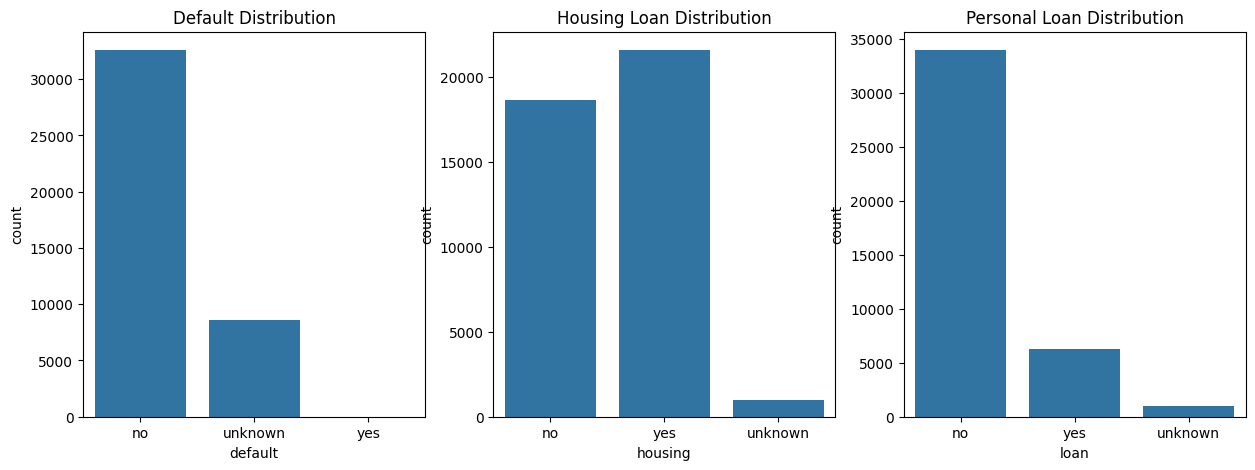

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='default', data=data)
plt.title('Default Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='housing', data=data)
plt.title('Housing Loan Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='loan', data=data)
plt.title('Personal Loan Distribution')

plt.show()


In [13]:
#code

In [14]:
#code

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [15]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
    return df

In [16]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [17]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    """
    Function for encoding age column using quartile values
    """
    Q1 = dataframe[age_col].quantile(0.25)
    Q3 = dataframe[age_col].quantile(0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    dataframe[age_col] = np.clip(dataframe[age_col], low_lim, up_lim)
          
    return dataframe

In [18]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [19]:
bank_relat = data[['contact', 'month', 'day_of_week', 'duration']]
print(bank_relat.isna().sum())

contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [20]:
print("Unique values in contact:", data['contact'].unique())
print("Unique values in month:", data['month'].unique())
print("Unique values in day_of_week:", data['day_of_week'].unique())

Unique values in contact: ['telephone' 'cellular']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



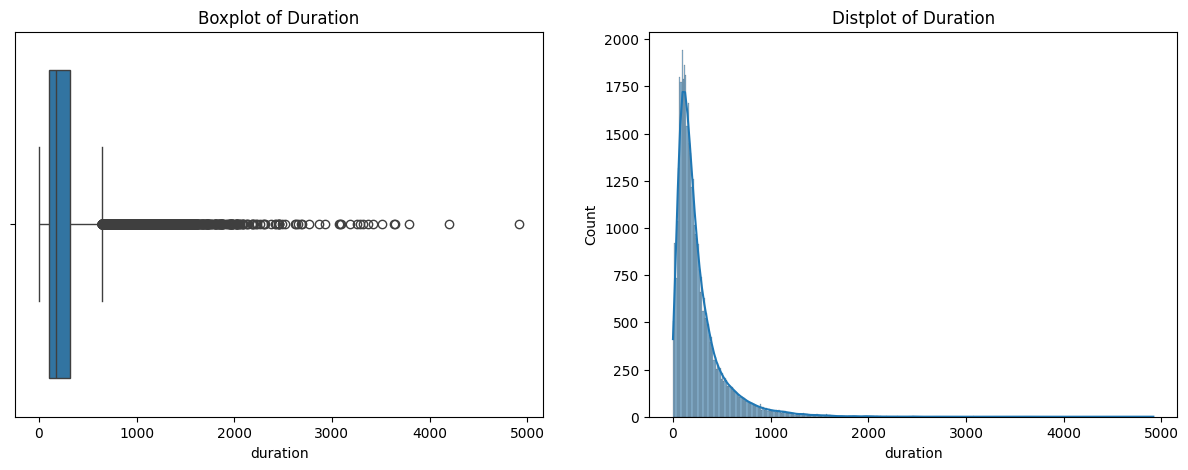

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='duration', data=data)
plt.title('Boxplot of Duration')

plt.subplot(1, 2, 2)
sns.histplot(data['duration'], kde=True)
plt.title('Distplot of Duration')
plt.show()


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [22]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [23]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column using quartile values
    """
    Q1 = dataframe[duration_col].quantile(0.25)
    Q3 = dataframe[duration_col].quantile(0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    dataframe[duration_col] = np.clip(dataframe[duration_col], low_lim, up_lim)
          
    return dataframe

In [24]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [25]:
bank_socec = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [26]:
bank_other = data[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [27]:
bank_other['poutcome'] = bank_other['poutcome'].map({'failure': 0, 'nonexistent': 1, 'success': 2})


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [28]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)


**Завдання 19** Провести ділення вибірки

In [29]:
def prepare_data_for_training(X, target, test_size, n_splits, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test, k_fold


In [30]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)
print(X_train, X_test, y_train, y_test, k_fold)

        age  job  marital  education  default  housing  loan  contact  month  \
39577  69.5    5        1          2        0        0     0        0      6   
10104  54.0    9        1          6        0        2     0        1      4   
17235  36.0    7        1          3        0        0     0        0      3   
20926  32.0    0        2          6        0        2     0        0      1   
17626  52.0    2        1          2        0        2     0        0      3   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
12363  30.0    7        0          3        0        2     2        0      3   
5695   50.0    2        1          2        0        2     0        1      6   
8006   35.0   11        1          2        0        0     0        1      4   
17745  44.0    1        1          7        1        0     2        0      3   
17931  39.0    1        1          7        0        2     0        0      3   

       day_of_week  duration  emp.var.r

In [31]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [32]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(accuracy_score(y_test, logpred))

[[7106  173]
 [ 619  340]]
0.9038601602330663


## k-NN

In [34]:
neighbors = np.arange(1, 26)

cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=k_fold, scoring='accuracy').mean() for k in neighbors]

optimal_k = neighbors[np.argmax(cv_scores)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(accuracy_score(y_test, knnpred))

[[7115  164]
 [ 649  310]]
0.9013109978150037


## Логістична Регресія

In [35]:
models = pd.DataFrame({'Models': ['Logistic Regression', 'k-NN'], 'Score': [accuracy_score(y_test, logpred), accuracy_score(y_test, knnpred)]})
print(models.sort_values(by='Score', ascending=False))

                Models     Score
0  Logistic Regression  0.903860
1                 k-NN  0.901311


**Висновки по моделям (детальні)**

1.   
2.   
3. ...